<a href="https://colab.research.google.com/github/georgesteve/Research-Assitant-ML-ROJ/blob/main/Compendio-S4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Importando librerías

In [3]:
import os
import datetime

import IPython
import IPython.display
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf

In [4]:
def find_S4_cluster(X,i=50,plt_s4=0):
  #Function expect an array 2D, minimun number of points desired for each cluster
  #And return an array with number of groups and number of points for each groups. As well return an array with initial array filtered with "i" like minimun number of points for each group

  from sklearn.metrics import silhouette_score
  from sklearn.cluster import KMeans
  import pandas as pd


#1
  sil = []
  kmax = 10


  # dissimilarity would not be defined for a single cluster, thus, minimum number of clusters should be 2
  for k in range(2, kmax+1):
    kmeans = KMeans(n_clusters = k).fit(X)
    labels = kmeans.labels_
    sil.append(silhouette_score(X, labels, metric = 'euclidean'))
  best_k=np.argmax(sil)+2


  #2
  
  kmeans = KMeans(n_clusters=best_k)
  model=kmeans.fit(X)
  y_kmeans = kmeans.predict(X)

  print(np.unique(y_kmeans))

  #3
  wq = model.labels_
  df = pd.DataFrame(wq)
  counts=df.value_counts()
  index=[]
  for i in counts[counts.values>i].index.values:
    index.append(i[0])
  #print(index)



  #df = pd.DataFrame(y_kmeans)
  #counts=df.value_counts()
  #print(counts)


  groups_s4 = pd.DataFrame(X,columns=['Tiempo','S4'])
  groups_s4['kmeans']=y_kmeans
  #print(df)
  #print(df.isin(index))
  #print(groups_s4[df.isin(index)])
  #print(groups_s4.filter(like = index, axis=0))
  #print(counts)
  #print(groups_s4)
  groups_filter=groups_s4[groups_s4.kmeans.isin(index)]

  if plt_s4==1:
    plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='viridis')

    centers = kmeans.cluster_centers_
    plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);
  elif plt_s4==2:
    plt.scatter(groups_filter.Tiempo, groups_filter.S4, c=groups_filter.kmeans, s=50, cmap='viridis')
  return (counts,groups_filter)


##Importando data

In [5]:
#tag='Piura'
tag='Cuzco'
#tag='Jicamarca'
URL = "https://raw.githubusercontent.com/georgesteve/Research-Assitant-ML-ROJ/main/Compendio/S4%20"+tag+"%20Feb-2021.csv"
Data = pd.read_csv(URL,index_col=False) 
s4=Data.drop(columns=['Unnamed: 0'])

In [ ]:
from google.colab import drive
drive.mount("/content/gdrive")

Mounted at /content/gdrive


In [ ]:
Data = pd.read_csv('/content/gdrive/My Drive/gfajardo_uNz2xU-2020.csv',index_col=False) 
s4=Data.drop(columns=['Unnamed: 0'])

In [ ]:
tag='S4 Piura Feb-2021'
#Data = pd.read_csv('/content/gdrive/My Drive/2019-2021.csv',index_col=False) 
Data = pd.read_csv('/content/gdrive/My Drive/'+tag+'.csv',index_col=False) 
s4=Data.drop(columns=['Unnamed: 0'])

##Transformando columnas de tiempo a formato datetime

In [6]:
s4['date_time'] = pd.to_datetime(s4['Año']*1000+s4['Day'], format='%y%j')+pd.Series([pd.Timedelta(seconds=x) for x in s4['Tiempo']])

s4.head(20)

,Año,Day,Tiempo,PRN,S4,Az,Elv,date_time
0,21,32,59,1,0.14,21.3,17.5,2021-02-01 00:00:59
1,21,32,59,3,0.09,89.5,38.4,2021-02-01 00:00:59
2,21,32,59,4,0.11,142.3,20.7,2021-02-01 00:00:59
3,21,32,59,6,0.04,236.8,44.4,2021-02-01 00:00:59
4,21,32,59,7,0.04,308.2,84.2,2021-02-01 00:00:59
5,21,32,59,9,0.06,180.5,39.5,2021-02-01 00:00:59
6,21,32,59,17,0.13,314.5,14.8,2021-02-01 00:00:59
7,21,32,59,19,0.12,290.2,13.7,2021-02-01 00:00:59
8,21,32,59,22,0.14,66.9,21.0,2021-02-01 00:00:59
9,21,32,59,30,0.06,322.4,46.7,2021-02-01 00:00:59


##Aplicando filtros

In [7]:
# azimuth cada 15 grados
s4_clean=s4[np.isfinite(s4['S4'])]
s4_clean.set_index('date_time', inplace=True)
s4_1min=s4_clean.resample("10s").mean()


#Filtros
s4_clean=s4_clean[s4_clean['Elv']>30]

##Hallando máximos (Valores S4>0.4)

In [8]:
s4_max=s4_clean[s4_clean['S4']>0.4]
print(s4_max)

                     Año  Day  Tiempo  PRN    S4     Az   Elv
date_time                                                    
2021-02-07 05:55:36   21   38   21336   17  0.43  127.0  32.1
2021-02-22 02:37:52   21   53    9472   13  0.43  201.5  30.9
2021-02-22 03:53:52   21   53   14032   15  0.56  213.3  30.2
2021-02-22 03:55:52   21   53   14152   15  0.61  213.3  31.0
2021-02-22 03:56:52   21   53   14212   15  0.48  213.3  31.4
2021-02-22 03:57:52   21   53   14272   15  0.76  213.3  31.8
2021-02-22 04:04:52   21   53   14692   15  0.44  213.4  34.6
2021-02-22 04:18:52   21   53   15532   15  0.57  214.4  40.5
2021-02-22 04:23:52   21   53   15832   15  0.49  215.0  42.6
2021-02-22 04:24:52   21   53   15892   15  0.48  215.1  43.0


#Segundos a horas

In [9]:
s4_clean['Tiempo']=s4_clean['Tiempo']/3600

In [10]:
print(np.unique(s4_max.index.date))

[datetime.date(2021, 2, 7) datetime.date(2021, 2, 22)]


[0 1]
0    168
1     43
dtype: int64
        Tiempo    S4  kmeans
0     0.076667  0.15       0
1     0.510000  0.17       0
2     0.643333  0.15       0
3     0.676667  0.18       0
4     0.710000  0.15       0
..         ...   ...     ...
206  21.961111  0.17       1
207  22.044444  0.17       1
208  22.077778  0.19       1
209  22.394444  0.15       1
210  23.744444  0.19       1

[211 rows x 3 columns]
[0 1]
0    223
1     13
dtype: int64
        Tiempo    S4  kmeans
0     0.497778  0.18       0
1     0.514444  0.28       0
2     0.531111  0.19       0
3     0.547778  0.25       0
4     0.564444  0.25       0
..         ...   ...     ...
231  19.947778  0.19       1
232  20.832222  0.20       1
233  20.848889  0.22       1
234  20.898889  0.19       1
235  21.032222  0.20       1

[236 rows x 3 columns]


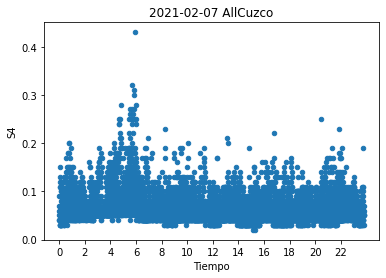

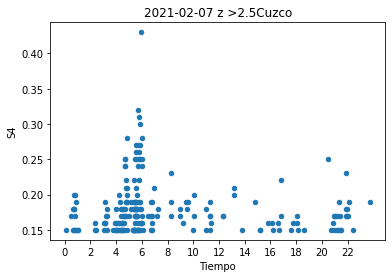

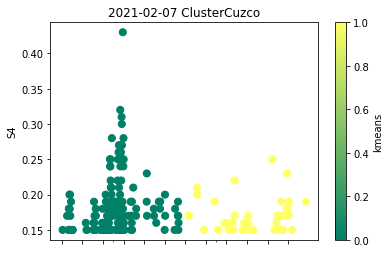

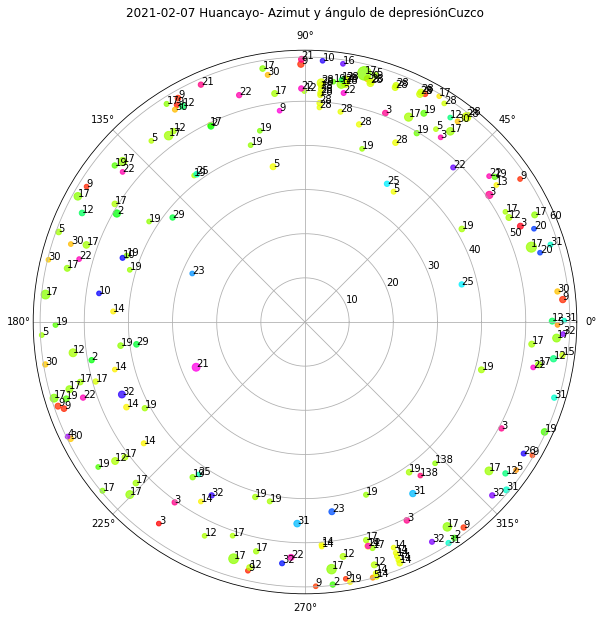

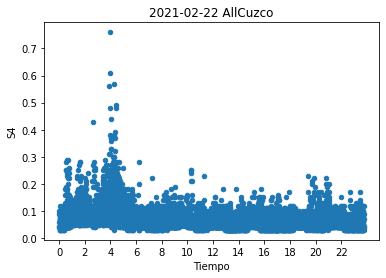

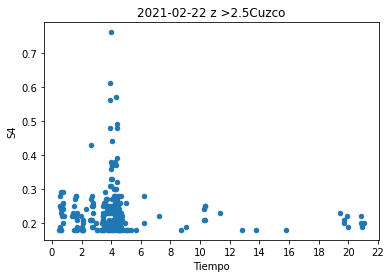

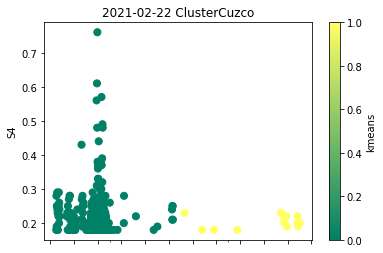

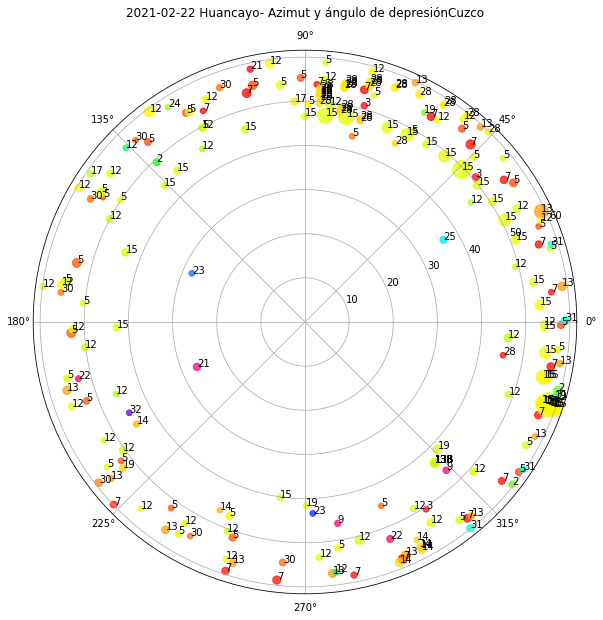

In [11]:


for i in np.unique(s4_max.index.date):
  s4_day_sp=s4_clean[s4_clean['Day']==i.timetuple().tm_yday]
  s4_day_sp1=s4_day_sp[s4_day_sp['Año']==i.year-2000]

  from scipy import stats
  import numpy as np
  z = np.abs(stats.zscore(s4_day_sp1.S4))
  #print(z)
  s4_day_i = s4_day_sp1[(z >2.5)]
  #print(s4_day_i)



  s4_day_sp1.plot.scatter(x='Tiempo',y='S4')
  plt.xticks(np.arange(0, 24, 2)) 
  plt.title(str(i)+' All'+tag)

  #s4_1min=s4_day_i.resample("1min").mean()
  s4_1min=s4_day_i
  s4_1min.plot.scatter(x='Tiempo',y='S4')
  plt.xticks(np.arange(0, 24, 2)) 
  plt.title(str(i)+' z >2.5'+tag)

  s4_day_i_Tiempo_S4=s4_day_i[['Tiempo','S4']].to_numpy()
  counts, clusters=find_S4_cluster(s4_day_i_Tiempo_S4,10)
  clusters.plot.scatter(x='Tiempo',y='S4',c='kmeans', s=50, cmap='summer')
  print(counts)
  print(clusters)
  plt.xticks(np.arange(0, 24, 2)) 
  plt.title(str(i)+' Cluster'+tag)


  fig = plt.figure(figsize=(10,10))
  ax = fig.add_subplot(projection='polar')
  plt.title(str(i)+' Huancayo- Azimut y ángulo de depresión'+tag)
  c = ax.scatter(s4_1min.Az, 90-s4_1min.Elv, c=s4_1min.Tiempo, s=s4_1min.S4*s4_1min.S4*1000, cmap='hsv', alpha=0.75)
  for i, txt in enumerate(s4_1min.PRN):
      s4azel=ax.annotate(txt, (s4_1min.Az[i], 90-s4_1min.Elv[i]))
      #ax.colorbar(s4azel)

2459246.5006828704
[datetime.datetime(2021, 1, 31, 0, 0), datetime.datetime(2021, 1, 31, 0, 0), datetime.datetime(2021, 1, 31, 0, 0), datetime.datetime(2021, 1, 31, 0, 0), datetime.datetime(2021, 2, 1, 0, 0), datetime.datetime(2021, 2, 1, 0, 0), datetime.datetime(2021, 2, 1, 0, 0), datetime.datetime(2021, 2, 1, 0, 0), datetime.datetime(2021, 2, 2, 0, 0), datetime.datetime(2021, 2, 2, 0, 0), datetime.datetime(2021, 2, 2, 0, 0), datetime.datetime(2021, 2, 3, 0, 0), datetime.datetime(2021, 2, 3, 0, 0), datetime.datetime(2021, 2, 3, 0, 0), datetime.datetime(2021, 2, 3, 0, 0), datetime.datetime(2021, 2, 4, 0, 0), datetime.datetime(2021, 2, 4, 0, 0), datetime.datetime(2021, 2, 4, 0, 0), datetime.datetime(2021, 2, 5, 0, 0), datetime.datetime(2021, 2, 5, 0, 0), datetime.datetime(2021, 2, 5, 0, 0), datetime.datetime(2021, 2, 5, 0, 0), datetime.datetime(2021, 2, 6, 0, 0), datetime.datetime(2021, 2, 6, 0, 0), datetime.datetime(2021, 2, 6, 0, 0), datetime.datetime(2021, 2, 7, 0, 0), datetime.datet

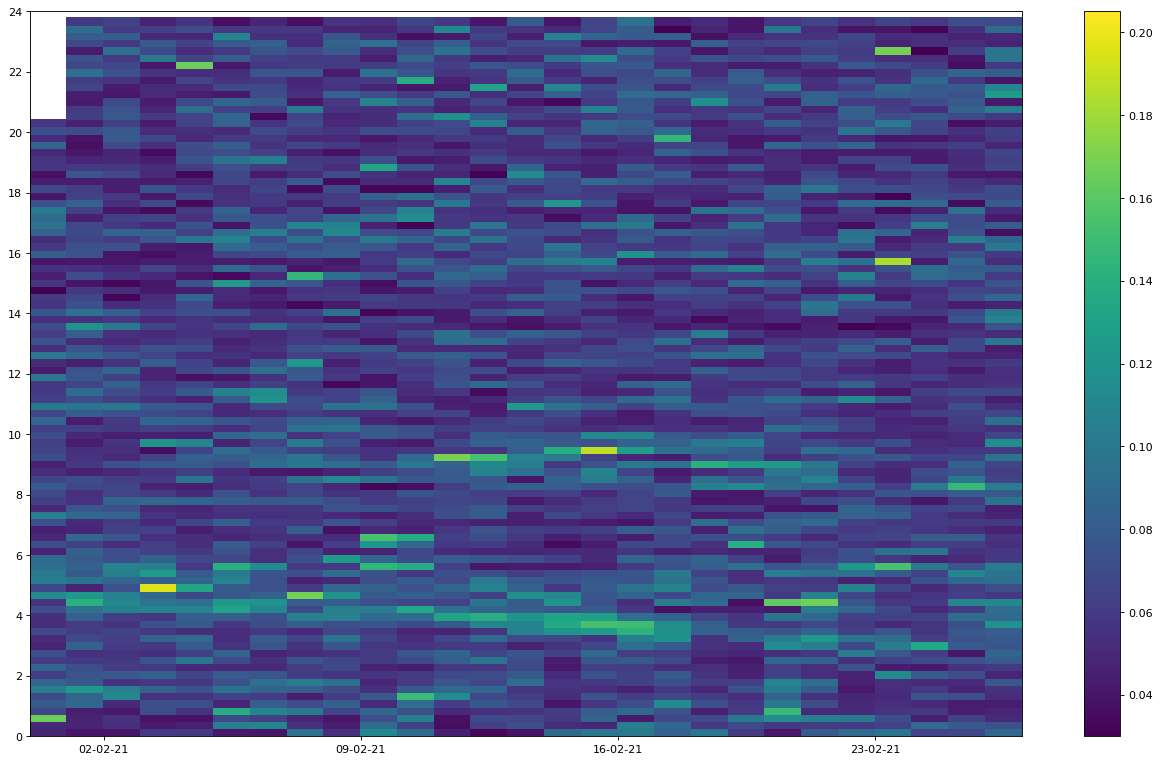

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import scipy.interpolate
import numpy as np
import matplotlib.colors as colors
from scipy.interpolate import griddata
from jdcal import jd2jcal
from datetime import datetime
from matplotlib.pyplot import figure


from matplotlib.colors import BoundaryNorm
from matplotlib.ticker import MaxNLocator


import matplotlib.ticker as ticker

from matplotlib.dates import DateFormatter
import matplotlib.dates as mdates




df=s4_clean

hour_minute=df.index.hour*60+df.index.minute
xi = np.linspace(df.index.to_julian_date().min(), df.index.to_julian_date().max(), 100)
print(df.index.to_julian_date().min())

yi = np.linspace(hour_minute.min(), hour_minute.max(), 100)
zi = griddata((df.index.to_julian_date(),hour_minute),df.S4,(xi[None,:],yi[:,None]),method='linear')

xij = [jd2jcal(12,v) for v in xi]
xid = [datetime(x[0],x[1],x[2]) for x in xij]
print(xid)


fig, ax = plt.subplots(figsize=(20, 13), dpi=80) ##13 es un error de las fuunciones de transformación a días julianos que se debe comprobar aún 


# x and y are bounds, so z should be the value *inside* those bounds.
# Therefore, remove the last value from the z array.

levels = MaxNLocator(nbins=10).tick_values(df.S4.min(), df.S4.max())


# pick the desired colormap, sensible levels, and define a normalization
# instance which takes data values and translates those into levels.
cmap = plt.get_cmap('PiYG')
norm = BoundaryNorm(levels, ncolors=cmap.N, clip=True)




#cp=ax.contour(xid,yi,zi,  3,colors='black')
#ax.clabel(cp, inline=True, fontsize=10)

m=ax.pcolormesh(xid, yi/60, zi)
plt.yticks(np.arange(0,25,2))#min(x), max(x)+1, 1.0))

# Define the date format
date_form = DateFormatter("%d-%m-%y")
ax.xaxis.set_major_formatter(date_form)

# Ensure a major tick for each week using (interval=1) 
ax.xaxis.set_major_locator(mdates.WeekdayLocator(interval=1))

fig.colorbar(m)

In [ ]:
from jdcal import jcal2jd
print(df.index.to_julian_date().min())
print(*jcal2jd(2021, 2, 1))

2459246.5005092593
2400000.5 59259.0


In [ ]:
clusters

,Tiempo,S4,kmeans
0,0.211944,0.18,0
1,1.028611,0.17,0
2,2.611944,0.17,0
3,2.928611,0.17,0
4,6.145278,0.18,0
...,...,...,...
130,18.878611,0.21,1
131,19.261944,0.18,1
132,19.478611,0.17,1
133,19.845278,0.17,1


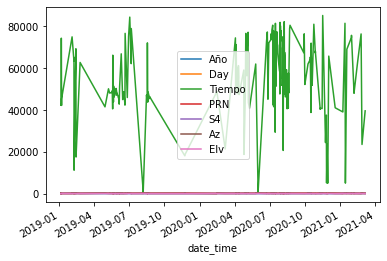

In [ ]:
s4_max.plot()

##Generando grupos

In [ ]:

#s4["Azint"]=s4["Az"].astype(float)

clasi=s4_clean.groupby(pd.cut(s4_clean["Az"], np.arange(0, 361, 30)))
#print(list(m))
print(clasi.groups.keys())
#print(np.arange(0, 360, 30))




dict_keys([Interval(0, 30, closed='right'), Interval(30, 60, closed='right'), Interval(60, 90, closed='right'), Interval(90, 120, closed='right'), Interval(120, 150, closed='right'), Interval(150, 180, closed='right'), Interval(180, 210, closed='right'), Interval(210, 240, closed='right'), Interval(240, 270, closed='right'), Interval(270, 300, closed='right'), Interval(300, 330, closed='right'), Interval(330, 360, closed='right')])


[15. 30. 45. 60. 75.]


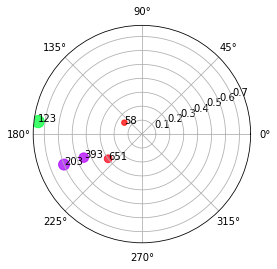

In [ ]:
y = [2.56422, 3.77284, 3.52623, 3.51468, 3.02199]
z = [0.15, 0.3, 0.45, 0.6, 0.75]
n = [58, 651, 393, 203, 123]
print(np.multiply(100,z))
fig = plt.figure()
ax = fig.add_subplot(projection='polar')
c = ax.scatter(y, z, c=y, s=np.multiply(200,z), cmap='hsv', alpha=0.75)
for i, txt in enumerate(n):
    ax.annotate(txt, (y[i], z[i]))